In [5]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [395]:
raw_train_df = pd.read_csv('train.csv')
raw_test_df = pd.read_csv('test.csv')
# combine these datasets to run certain operations on both datasets together.
raw_combine = [raw_train_df, raw_test_df]

In [248]:
raw_train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [249]:
raw_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Categorical: Survived, Sex, Embarked
#### Ordinal: Pclass
#### Numerical: (discrete): Sibsp, Parch
####                    (continious): Age, Fare

In [191]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
raw_train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kelly, Mrs. Florence ""Fannie""",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### ? Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
#### Survived is a categorical feature with 0 or 1 values.
#### Around 38% samples survived representative of the actual survival rate at 32%.
### ? Most passengers (> 75%) did not travel with parents or children.
### ? Nearly 30% of the passengers had siblings and/or spouse aboard.
### ? Fares varied significantly with few passengers (<1%) paying as high as $512.
### ? Few elderly passengers (<1%) within age range 65-80.

#### Names are unique across the dataset (count=unique=891)
#### Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
#### Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#### Embarked takes three possible values. S port used by most passengers (top=S)
#### Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [193]:
raw_train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [194]:
raw_train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [195]:
raw_train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [196]:
raw_train_df[["Parch", "Survived"]].groupby('Parch',as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


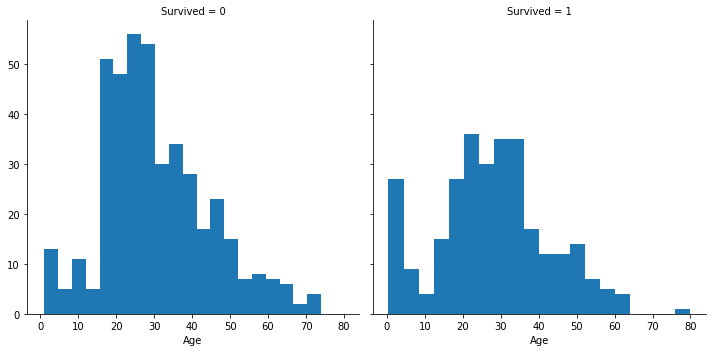

In [197]:
g = sns.FacetGrid(raw_train_df, col='Survived', height=5)
g.map(plt.hist, 'Age', bins=20)

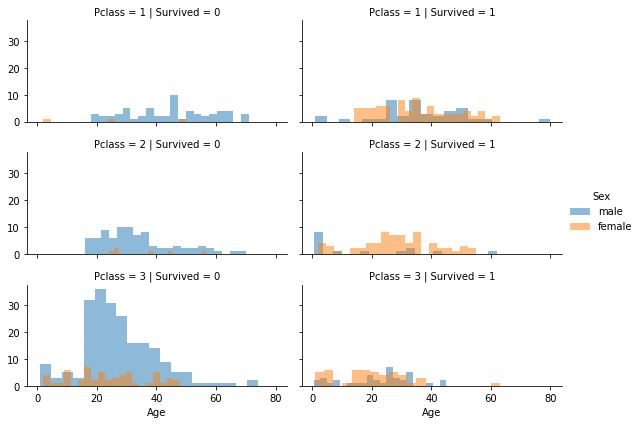

In [198]:
grid = sns.FacetGrid(raw_train_df, col='Survived', row='Pclass', height=2, aspect=2, hue='Sex')
grid.map(plt.hist, 'Age', bins=20, alpha=.5)
grid.add_legend()

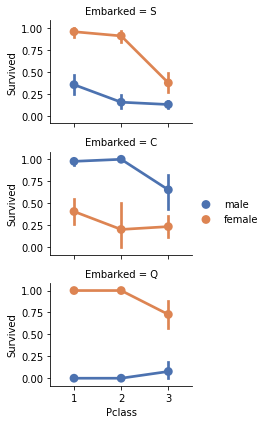

In [200]:
grid = sns.FacetGrid(raw_train_df, row='Embarked', height=2, aspect=1.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

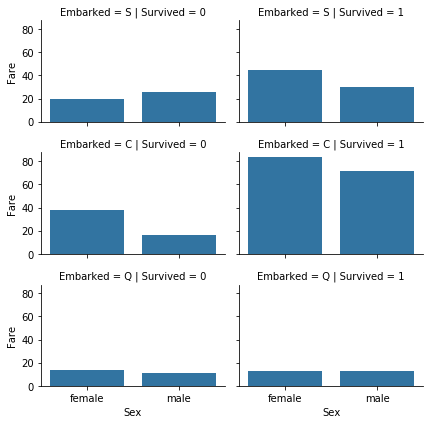

In [202]:
grid = sns.FacetGrid(raw_train_df, row='Embarked', col='Survived', height=2, aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

### dropping data (checkpoint)

In [694]:
train_df = raw_train_df.copy()
test_df = raw_test_df.copy()
combine = [train_df, test_df]

In [695]:
train_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [696]:
combine[0].shape, combine[1].shape

((891, 10), (418, 9))

In [697]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [698]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [699]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [700]:
train_df['Title'].unique(), test_df['Title'].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
        'Jonkheer'], dtype=object),
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
       dtype=object))

In [701]:
for dataset in combine:
    dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',
                              'Lady', 'Major','Rev', 'Sir', 'Dona'],
                              'Rare',
                             inplace=True)
    dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [702]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [703]:
# for dataset in combine:
#     dataset.drop(['PassengerId','Name'], axis=1, inplace=True)
train_df.drop(['PassengerId','Name'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)

In [704]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [705]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## dropped data (checkpoint)

In [755]:
dropped_train_df = train_df.copy()
dropped_test_df = test_df.copy()
dropped_combine = [dropped_train_df, dropped_test_df]

In [756]:
dropped_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


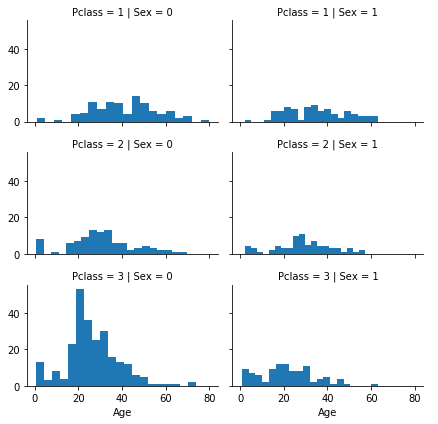

In [757]:
g = sns.FacetGrid(dropped_train_df, row='Pclass', col='Sex', height=2, aspect=1.5)
g.map(plt.hist, 'Age', bins=20)
g.add_legend()

In [758]:
guess_ages = np.zeros((2,3))

for dataset in dropped_combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0,3):
            dataset.loc[(dataset['Age'].isnull())
                        & (dataset['Sex'] == i)
                        & (dataset['Pclass'] == j+1), 'Age'] = guess_ages[i, j]
            
    dataset['Age'] = dataset['Age'].astype(int)


In [759]:
dropped_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [760]:
dropped_train_df['AgeBand'] = pd.cut(dropped_train_df['Age'], bins=5)
dropped_train_df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [761]:
for dataset in dropped_combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [762]:
dropped_train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [763]:
dropped_train_df.drop('AgeBand', axis=1, inplace=True)
dropped_train_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.25,S,1


In [764]:
dropped_test_df.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1


In [765]:
for dataset in dropped_combine:
    dataset['FamilySize'] = 1 + dataset['SibSp'] + dataset['Parch']

In [766]:
dropped_train_df[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [767]:
for dataset in dropped_combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [768]:
dropped_train_df[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [769]:
dropped_train_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.25,S,1,2,0


In [770]:
for dataset in dropped_combine:
    dataset.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [771]:
dropped_train_df.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.25,S,1,0


In [772]:
for dataset in dropped_combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']

In [773]:
dropped_train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(2)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1


In [774]:
dropped_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
Title        891 non-null int64
IsAlone      891 non-null int64
Age*Class    891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [775]:
freq_port = dropped_train_df['Embarked'].mode()[0]
freq_port

'S'

In [776]:
for dataset in dropped_combine:
    dataset['Embarked'].fillna(freq_port, inplace=True)

In [777]:
dropped_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null object
Title        891 non-null int64
IsAlone      891 non-null int64
Age*Class    891 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [778]:
dropped_train_df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [779]:
for dataset in dropped_combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [780]:
dropped_train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [781]:
dropped_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
IsAlone        418 non-null int64
Age*Class      418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [782]:
dropped_test_df['Fare'].fillna(dropped_test_df['Fare'].median(), inplace=True)

In [783]:
dropped_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
IsAlone        418 non-null int64
Age*Class      418 non-null int64
dtypes: float64(1), int64(8)
memory usage: 29.5 KB


In [784]:
dropped_train_df['FareBand'] = pd.qcut(dropped_train_df['Fare'], 4)
dropped_train_df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='Survived', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [785]:
for dataset in dropped_combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [786]:
dropped_train_df.drop('FareBand', axis=1, inplace=True)

In [787]:
dropped_train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [788]:
dropped_test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3


## end of cleaning (checkpoint)
## model : Supervised Learning plus Classification and Regression
### Logistic Regression
### KNN or k-Nearest Neighbors
### Support Vector Machines
### Naive Bayes classifier
### Decision Tree
### Random Forrest
### Perceptron
### Artificial neural network
### RVM or Relevance Vector Machine)

In [792]:
preposed_train_df = dropped_train_df.copy()
preposed_test_df = dropped_test_df.copy()
preposed_combine = [preposed_train_df, preposed_test_df]

In [796]:
X_train = preposed_train_df.drop('Survived', axis=1)
y_train = preposed_train_df['Survived']
X_test = preposed_test_df.drop('PassengerId', axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [797]:
X_train.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3


In [798]:
y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [799]:
X_test.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6


In [800]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
acc_log

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



80.36

In [801]:
coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


In [802]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
acc_svc

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



83.84

In [803]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
acc_knn

84.74

In [804]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100, 2)
acc_gaussian

72.28

In [805]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred =perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train)*100, 2)
acc_perceptron

78.34

In [806]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train)*100, 2)
acc_linear_svc

/Users/hiroki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



79.12

In [816]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train)*100, 2)
acc_sgd

75.87

In [817]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train)*100, 2)
acc_decision_tree

86.76

In [818]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
acc_random_forest

86.76

In [819]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'KNN',
              'Naive Bayers','Perceptron', 'Linear SVC',
              'Stochastic Gradient Decent','Decision Tree','Random Forest'],
    'Score': [acc_log, acc_svc, acc_knn,
              acc_gaussian, acc_perceptron, acc_linear_svc,
              acc_sgd, acc_decision_tree, acc_random_forest]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
7,Decision Tree,86.76
8,Random Forest,86.76
2,KNN,84.74
1,Support Vector Machine,83.84
0,Logistic Regression,80.36
5,Linear SVC,79.12
4,Perceptron,78.34
6,Stochastic Gradient Decent,75.87
3,Naive Bayers,72.28


In [821]:
submission = pd.DataFrame({
    'PassengerId': preposed_test_df['PassengerId'],
    'Survived': y_pred
})

In [824]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [828]:
submission.to_csv('ManavSehgal_submission.csv', index=False)
# submission.to_csv('../output/submission.csv', index=False)